## Observations and Insights 

In [ ]:
#Observations
#1. The correlation coefficient between Tumor Volume and Mouse Weight is approximately 0.95. 
#   The value so close to 1 indicates that there is a strong linear relationship between tumor volume and weight, 
#   also the positve correlation value indicates that as the mouse weight increases, the tumor volume also increases 
#2. The pie chart below shows that the test population is almost equally divided between male and female mouses
#3. The box plots of 4 Drug Regimens - Capomulin, Ramicane, Infubinol and Ceftamin, which are the most leading and trailing drugs respectively, do not have many outliers.


In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
# Display the data table for preview
mouse_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_results_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Since the instructions say we have to delete ALL the data associated with the duplicate mouse, I am passing the argument "keep = False"
#There has been some confusion about understanding what rows to delete for duplicate mouses, I am going with the instructions in the homeworks folder for this project.
duplicate_id_df = mouse_results_df[mouse_results_df.duplicated(subset=["Mouse ID","Timepoint"], keep = False)]
duplicate_id = duplicate_id_df["Mouse ID"]
duplicate_id

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_id_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

duplicate_index = duplicate_id_df["Mouse ID"].index
mouse_results_df = mouse_results_df.drop(mouse_results_df.index[duplicate_index])
mouse_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = mouse_results_df["Mouse ID"].count()
clean_mouse_count

1883

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mouse_data = mouse_results_df.groupby("Drug Regimen")
mean_data = grouped_mouse_data["Tumor Volume (mm3)"].mean()
median_data = grouped_mouse_data["Tumor Volume (mm3)"].median()
var_std_data = mouse_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.var,np.std]) 
sample_mouse_data = mouse_results_df.sample(100)
sem_data = sample_mouse_data.groupby("Drug Regimen").sem()
summary_df = pd.merge(mean_data,median_data, on ="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)_x" : " Mean", "Tumor Volume (mm3)_y":"Median"})
summary_df = pd.merge(summary_df,var_std_data, on = "Drug Regimen")
summary_df = summary_df.rename(columns={"var":"Variance","std":"Standard Deviation"})
sem_data_tumor_volume = sem_data[["Tumor Volume (mm3)"]]
summary_df = pd.merge(summary_df,sem_data_tumor_volume, on = "Drug Regimen")
summary_df = summary_df.rename(columns = {"Tumor Volume (mm3)":"SEM"})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.906253
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.574077
Infubinol,52.884795,51.820584,43.128684,6.567243,2.561475
Ketapril,55.235638,53.698743,68.553577,8.279709,3.689653
Naftisol,54.331565,52.509285,66.173479,8.134708,2.383969
Placebo,54.033581,52.288934,61.168083,7.821003,3.522596
Propriva,52.458254,50.854632,44.053659,6.637293,3.780385
Ramicane,40.216745,40.673236,23.486704,4.846308,1.948623
Stelasyn,54.233149,52.431737,59.450562,7.710419,2.480450


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregated_summary_df = mouse_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median",np.var,np.std,sem])
aggregated_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mouse tested')

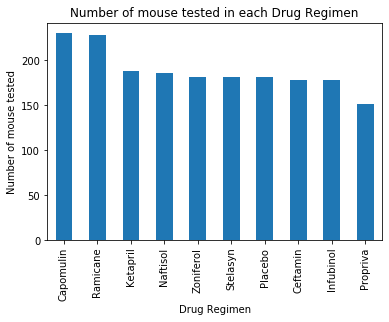

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_results_df
regimen_specimen_count = mouse_results_df["Drug Regimen"].value_counts()
regimen_specimen_count
x_axis = regimen_specimen_count.index
y_axis = regimen_specimen_count.values
my_bar_chart = regimen_specimen_count.plot.bar(x=regimen_specimen_count.index,y=regimen_specimen_count.values,rot ="vertical", title = "Number of mouse tested in each Drug Regimen")

my_bar_chart.set_xlabel("Drug Regimen")
my_bar_chart.set_ylabel("Number of mouse tested")

Text(0.5, 1.0, 'Number of mouse tested in each Drug Regimen')

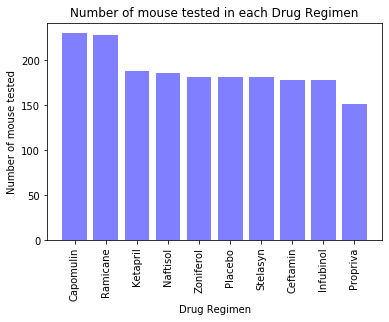

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mouse tested")
plt.xticks(x_axis,drugs,rotation = "vertical")
plt.title("Number of mouse tested in each Drug Regimen")


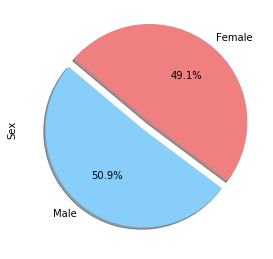

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mouse_results_df["Sex"].value_counts()
gender_df
labels = gender_df.index
gender_count = gender_df.values
colors = ["lightskyblue","lightcoral"]
explode = (0,0.1)
pie_plot = gender_df.plot.pie(y="gender_count", figsize=(4.5,4.5),autopct="%1.1f%%",colors=colors,startangle=140, explode = explode, shadow = True)

(-1.1131616278762624,
 1.1920552824220751,
 -1.1142996506133984,
 1.2049240344280967)

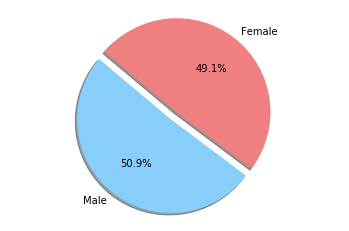

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
subset_regimen_data = mouse_results_df.loc[(mouse_results_df["Drug Regimen"] == "Capomulin")|(mouse_results_df["Drug Regimen"] == "Ceftamin")|(mouse_results_df["Drug Regimen"] == "Infubinol")|(mouse_results_df["Drug Regimen"] == "Ramicane"),:]
# Start by getting the last (greatest) timepoint for each mouse
#final_tumor_data = subset_regimen_data[subset_regimen_data.duplicated(subset=["Mouse ID","Drug Regimen"], keep = False)]
#duplicate_tumor_id = final_tumor_data["Mouse ID"]
#final_tumor_data
#duplicate_tumor_index = final_tumor_data["Mouse ID"].index
#duplicate_tumor_index
#mouse_results_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#duplicate_tumor_df = subset_regimen_data.drop(subset_regimen_data.index[duplicate_tumor_index])
#duplicate_tumor_df



# I have taken a different approach to do this problem.
#I created a seperate subset of dataframe for each drug regime, and then used the duplicated function to only keep the last timepoint
# Capomulin
capomulin_data = mouse_results_df.loc[(mouse_results_df["Drug Regimen"] == "Capomulin")]
capomulin_data.reset_index(inplace = True)
# Find duplicates, for each mouse id find the final tumor volume, keep this row and drop the duplicates using Mouse ID column
cleaned_capomulin_data = capomulin_data[capomulin_data.duplicated(subset=["Mouse ID"], keep = 'last')]
capomulin_index = cleaned_capomulin_data.index
capomulin_data = capomulin_data.drop(capomulin_data.index[capomulin_index])
capomulin_data

# Ramicane
ramicane_data = mouse_results_df.loc[(mouse_results_df["Drug Regimen"] == "Ramicane")]
ramicane_data.reset_index(inplace = True)
# Find duplicates, for each mouse id find the final tumor volume, keep this row and drop the duplicates using Mouse ID column
cleaned_ramicane_data = ramicane_data[ramicane_data.duplicated(subset=["Mouse ID"], keep = 'last')]
ramicane_index = cleaned_ramicane_data.index
ramicane_data = ramicane_data.drop(ramicane_data.index[ramicane_index])
#ramicane_data["Tumor Volume (mm3)"] = ramicane_data["Tumor Volume (mm3)"].map("{:,.2f}".format)
ramicane_data


# Infubinol
infubinol_data = mouse_results_df.loc[(mouse_results_df["Drug Regimen"] == "Infubinol")]
infubinol_data.reset_index(inplace = True)
# Find duplicates, for each mouse id find the final tumor volume, keep this row and drop the duplicates using Mouse ID column
cleaned_infubinol_data = infubinol_data[infubinol_data.duplicated(subset=["Mouse ID"], keep = 'last')]
infubinol_index = cleaned_infubinol_data.index
infubinol_data = infubinol_data.drop(infubinol_data.index[infubinol_index])
#infubinol_data["Tumor Volume (mm3)"] = infubinol_data["Tumor Volume (mm3)"].map("{:,.2f}".format)
infubinol_data

# Ceftamin
ceftamin_data = mouse_results_df.loc[(mouse_results_df["Drug Regimen"] == "Ceftamin")]
ceftamin_data.reset_index(inplace = True)
# Find duplicates, for each mouse id find the final tumor volume, keep this row and drop the duplicates using Mouse ID column
cleaned_ceftamin_data = ceftamin_data[ceftamin_data.duplicated(subset=["Mouse ID"], keep = 'last')]
ceftamin_index = cleaned_ceftamin_data.index
ceftamin_data = ceftamin_data.drop(ceftamin_data.index[ceftamin_index])
#ceftamin_data["Tumor Volume (mm3)"] = ceftamin_data["Tumor Volume (mm3)"].map("{:,.2f}".format)


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Quartile study for Capomulin
capomulin_tv = capomulin_data["Tumor Volume (mm3)"]
quartiles_capomulin = capomulin_tv.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

print(f"The lower quartile of Tumor Volume for Drug Regimen Capomulin is: {lowerq_capomulin}")
print(f"The upper quartile of Tumor Volume for Drug Regimen Capomulin is: {upperq_capomulin}")
print(f"The interquartile range of Tumor Volume for Drug Regimen Capomulin is: {iqr_capomulin}")
print(f"The median of Tumor Volume for Drug Regimen Capomulin is: {quartiles_capomulin[0.5]} ")

lower_bound_cap = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_cap = upperq_capomulin + (1.5*iqr_capomulin)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")   

#Ramicane
ramicane_tv = ramicane_data["Tumor Volume (mm3)"]
quartiles_ramicane = ramicane_tv.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

print(f"The lower quartile of Tumor Volume for Drug Regimen Ramicane is: {lowerq_ramicane}")
print(f"The upper quartile of Tumor Volume for Drug Regimen Ramicane is: {upperq_ramicane}")
print(f"The interquartile range of Tumor Volume for Drug Regimen Ramicane is: {iqr_ramicane}")
print(f"The median of Tumor Volume for Drug Regimen Ramicane is: {quartiles_ramicane[0.5]} ")

lower_bound_ram = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ram = upperq_ramicane + (1.5*iqr_ramicane)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.") 

#Infubinol
infubinol_tv = infubinol_data["Tumor Volume (mm3)"]
quartiles_infubinol = infubinol_tv.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

print(f"The lower quartile of Tumor Volume for Drug Regimen Infubinol is: {lowerq_infubinol}")
print(f"The upper quartile of Tumor Volume for Drug Regimen Infubinol is: {upperq_infubinol}")
print(f"The interquartile range of Tumor Volume for Drug Regimen Infubinol is: {iqr_infubinol}")
print(f"The median of Tumor Volume for Drug Regimen Infubinol is: {quartiles_infubinol[0.5]} ")

lower_bound_inf = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_inf = upperq_infubinol + (1.5*iqr_infubinol)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.") 

#Ceftamin

ceftamin_tv = ceftamin_data["Tumor Volume (mm3)"]
quartiles_ceftamin = ceftamin_tv.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

print(f"The lower quartile of Tumor Volume for Drug Regimen Ceftamin is: {lowerq_ceftamin}")
print(f"The upper quartile of Tumor Volume for Drug Regimen Ceftamin is: {upperq_ceftamin}")
print(f"The interquartile range of Tumor Volume for Drug Regimen Ceftamin is: {iqr_ceftamin}")
print(f"The median of Tumor Volume for Drug Regimen Ceftamin is: {quartiles_ceftamin[0.5]} ")

lower_bound_ceft = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceft = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"Values below {lower_bound_ceft} could be outliers.")
print(f"Values above {upper_bound_ceft} could be outliers.") 

The lower quartile of Tumor Volume for Drug Regimen Capomulin is: 32.37735684
The upper quartile of Tumor Volume for Drug Regimen Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Drug Regimen Capomulin is: 7.781863460000004
The median of Tumor Volume for Drug Regimen Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Tumor Volume for Drug Regimen Ramicane is: 31.56046955
The upper quartile of Tumor Volume for Drug Regimen Ramicane is: 40.65900627
The interquartile range of Tumor Volume for Drug Regimen Ramicane is: 9.098536719999998
The median of Tumor Volume for Drug Regimen Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Tumor Volume for Drug Regimen Infubinol is: 54.04860769
The upper quartile of Tumor Volume for Drug Regimen Infubinol is: 65.52574285
The interquartile ran

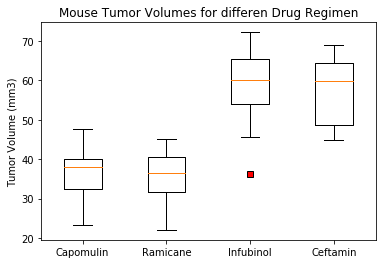

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#showing outliers in red square
red_square = dict(markerfacecolor='r', marker='s')

data = [capomulin_tv,ramicane_tv,infubinol_tv,ceftamin_tv]

fig1, ax1 = plt.subplots()
ax1.set_title('Mouse Tumor Volumes for differen Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=red_square)
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol' , 'Ceftamin'])
ax1.set_xticks([1, 2, 3, 4])

plt.show()

## Line and Scatter Plots

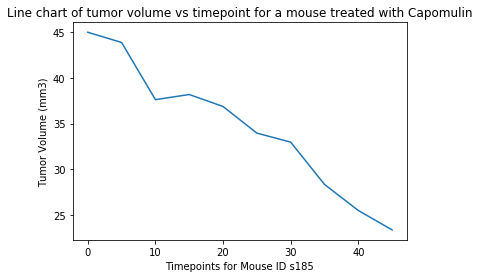

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_results_df
#displaying line plot for mouse id "s185"
subset_df = mouse_results_df.loc[mouse_results_df["Mouse ID"] == "s185",:]
x_data = subset_df["Tumor Volume (mm3)"]
tumor_volume_data = x_data.values
y_data = subset_df["Timepoint"]
timepoint_data = y_data.values
timepoint_data
plt.xlabel("Timepoints for Mouse ID s185")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Line chart of tumor volume vs timepoint for a mouse treated with Capomulin")
plt.plot(timepoint_data,tumor_volume_data)


Text(0.5, 1.0, 'Scatter plot of Average Tumor Volume and Mouse Weight')

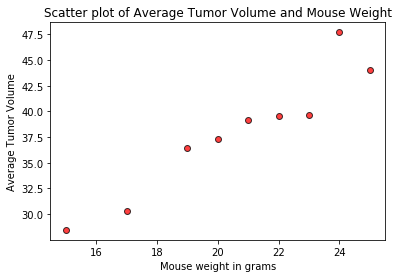

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

groupby_df = capomulin_data.groupby(["Weight (g)"])
correlation_df = groupby_df["Tumor Volume (mm3)"].mean()
correlation_df
weight = correlation_df.index
weight
avg_tumor_volume = correlation_df.values
plt.scatter(weight,avg_tumor_volume, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.xlabel('Mouse weight in grams')
plt.ylabel('Average Tumor Volume')
plt.title("Scatter plot of Average Tumor Volume and Mouse Weight")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation
correlation_coefficient = st.pearsonr(weight,avg_tumor_volume)
correlation_coefficient


(0.9503881112220831, 8.530042896456125e-05)

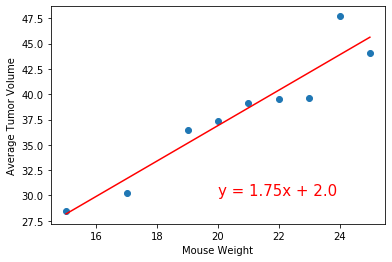

The R Squared value is : 0.9032375619522788


In [22]:
#Linear regression and line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,avg_tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()
print("The R Squared value is : "+ str(rvalue ** 2))